# Case Study Sales - Time Series Forecasting

Analysis of a company's sales data, including seasonal effects. I ask and try to answer questions like:
- Can we predict future sales data from past sales data?
- What will sales look like in the future?

Methods employed:
- Analysis of data

Tools and frameworks that I used:
- Pandas
- Numpy
- Matplotlib, Seaborn

*Data and inspiration from: https://www.udemy.com/course/data-science-for-business-6-real-world-case-studies/*

## 1. Import, analyze and pre-clean data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#import sklearn

#pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('precision', 2)
#pd.reset_option('precision')

df_store_info = pd.read_csv('store.csv')
df_train_sales = pd.read_csv('train.csv')

C:\Users\Johannes\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_train_sales.sample(5)
df_train_sales.info()
df_train_sales.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
374969,255,2,2014-08-05,6379,614,1,1,0,1
506702,163,4,2014-04-03,7369,934,1,1,0,0
181973,229,3,2015-02-18,8708,724,1,1,0,0
782736,792,2,2013-07-30,11839,906,1,1,0,1
489136,437,6,2014-04-19,13013,1328,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.02e+06,1.02e+06,1.02e+06,1.02e+06,1.02e+06,1.02e+06,1.02e+06
mean,5.58e+02,4.00e+00,5.77e+03,6.33e+02,8.30e-01,3.82e-01,1.79e-01
std,3.22e+02,2.00e+00,3.85e+03,4.64e+02,3.76e-01,4.86e-01,3.83e-01
min,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
25%,2.80e+02,2.00e+00,3.73e+03,4.05e+02,1.00e+00,0.00e+00,0.00e+00
50%,5.58e+02,4.00e+00,5.74e+03,6.09e+02,1.00e+00,0.00e+00,0.00e+00
75%,8.38e+02,6.00e+00,7.86e+03,8.37e+02,1.00e+00,1.00e+00,0.00e+00
max,1.12e+03,7.00e+00,4.16e+04,7.39e+03,1.00e+00,1.00e+00,1.00e+00


In [3]:
df_store_info.sample(5)
df_store_info.info()
df_store_info.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
300,301,a,c,4510.0,3.0,2015.0,0,NaN,NaN,NaN
835,836,a,a,2720.0,9.0,2012.0,0,NaN,NaN,NaN
635,636,c,a,720.0,10.0,2004.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
530,531,a,c,4030.0,NaN,NaN,0,NaN,NaN,NaN
204,205,a,a,110.0,12.0,2007.0,0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


#### Observations
- Average distance to competition stores: 5.4 km
- Half of the stores participate in promo2 activities

#### Find missing data for df_train_sales
- No missing data points found via heatmap

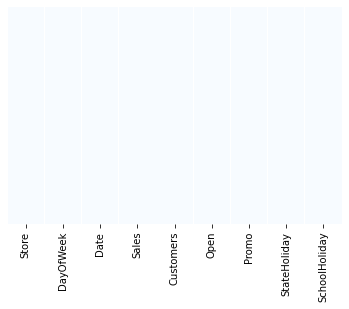

In [7]:
sns.heatmap(df_train_sales.isnull(), yticklabels=False, cbar=False, cmap='Blues');

#### Distribution
- All stores contribute approximately same amount of data
- ~600 customers per day
- Stores are open ~ 80% of time
- Promo1 was running ~39% of time
- Average sales ~ 6000 €

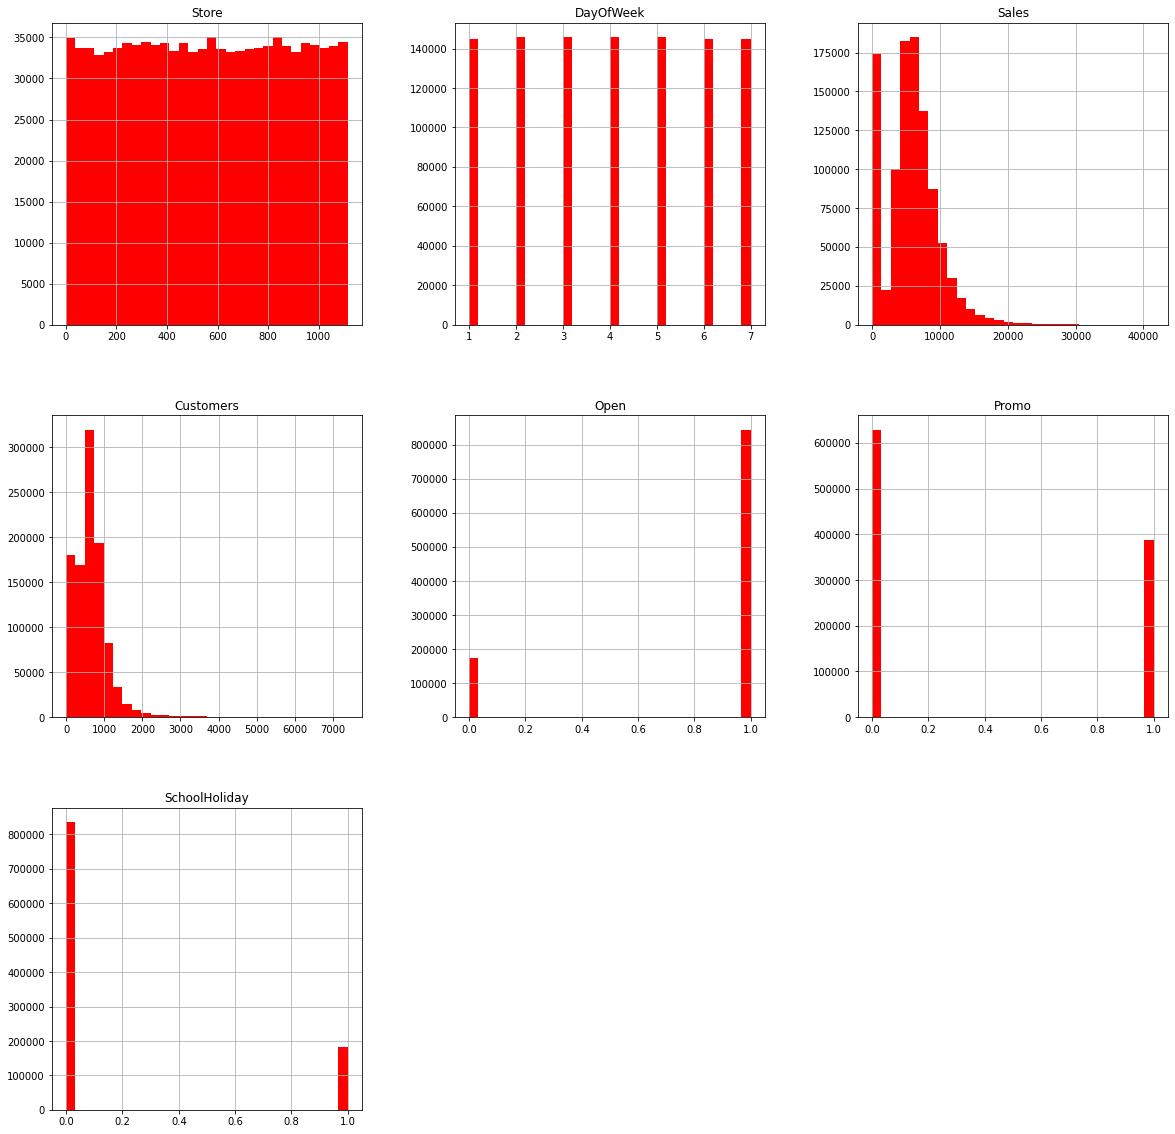

In [8]:
df_train_sales.hist(bins=30, figsize=(20,20), color='r');

In [21]:
print('Max. customers: ',df_train_sales.Customers.max())

df_train_closed = df_train_sales[df_train_sales['Open'] == 0]
df_train_open = df_train_sales[df_train_sales['Open'] == 1]
print('\nTotal stores: ', len(df_train_sales))
print('Closed stores: ', len(df_train_closed))
print('Open stores: ', len(df_train_open))

Max. customers:  7388

Total stores:  1017209
Closed stores:  172817
Open stores:  844392


In [25]:
try:
    df_train_open.drop(['Open'], axis=1, inplace=True)
except:
    pass
df_train_open.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00
mean,558.42,3.52,6955.51,762.73,0.45,0.19
std,321.73,1.72,3104.21,401.23,0.50,0.40
min,1.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,4859.00,519.00,0.00,0.00
50%,558.00,3.00,6369.00,676.00,0.00,0.00
75%,837.00,5.00,8360.00,893.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00


#### Observations
- Analysing only data from open stores corrects averaged data
- Customer average increased to 763
- Sales average increased to ~7000 €

#### Find missing data for df_store_info

<AxesSubplot:>

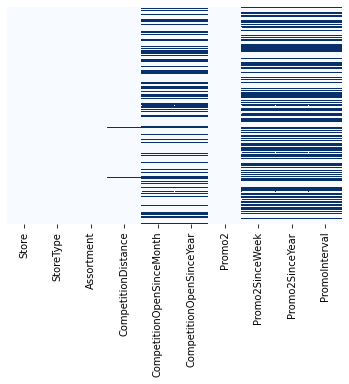

In [26]:
sns.heatmap(df_store_info.isnull(), cbar=False, cmap='Blues', yticklabels=False);

In [27]:
df_store_info[df_store_info['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [28]:
df_store_info[df_store_info['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [29]:
df_store_info[df_store_info['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
len(df_store_info[df_store_info['Promo2SinceWeek'].isnull()])
len(df_store_info[df_store_info['Promo2SinceYear'].isnull()])
len(df_store_info[df_store_info['PromoInterval'].isnull()])
df_store_info[df_store_info['Promo2SinceWeek'].isnull() & df_store_info['Promo2SinceYear'].isnull() & df_store_info['PromoInterval'].isnull()]

544

544

544

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


#### Handling missing data
- CompetitionDistance only has 3 missing values --> replace NaN with average distance
- Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN, if there was no Promo2 going on (0) --> set to 0
- CompetitionOpenSinceMonth and CompetitionOpenSinceYear are NaN, if information is unknown --> set to 0

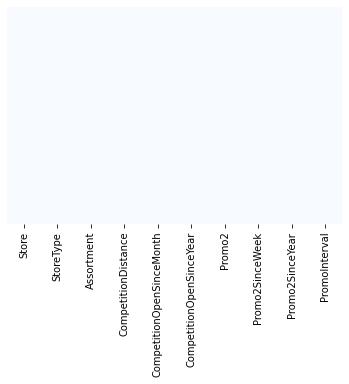

In [39]:
df_store_info['CompetitionDistance'].fillna(df_store_info['CompetitionDistance'].mean(), inplace=True)

zero_columns = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for column in zero_columns:
    df_store_info[column].fillna(0, inplace=True)

sns.heatmap(df_store_info.isnull(), cbar=False, cmap='Blues', yticklabels=False);

#### Distribution
- All stores contribute approximately same amount of data
- Competition distance is mostly < 5 km
- Mostly unknown how long competition was open for
- 

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

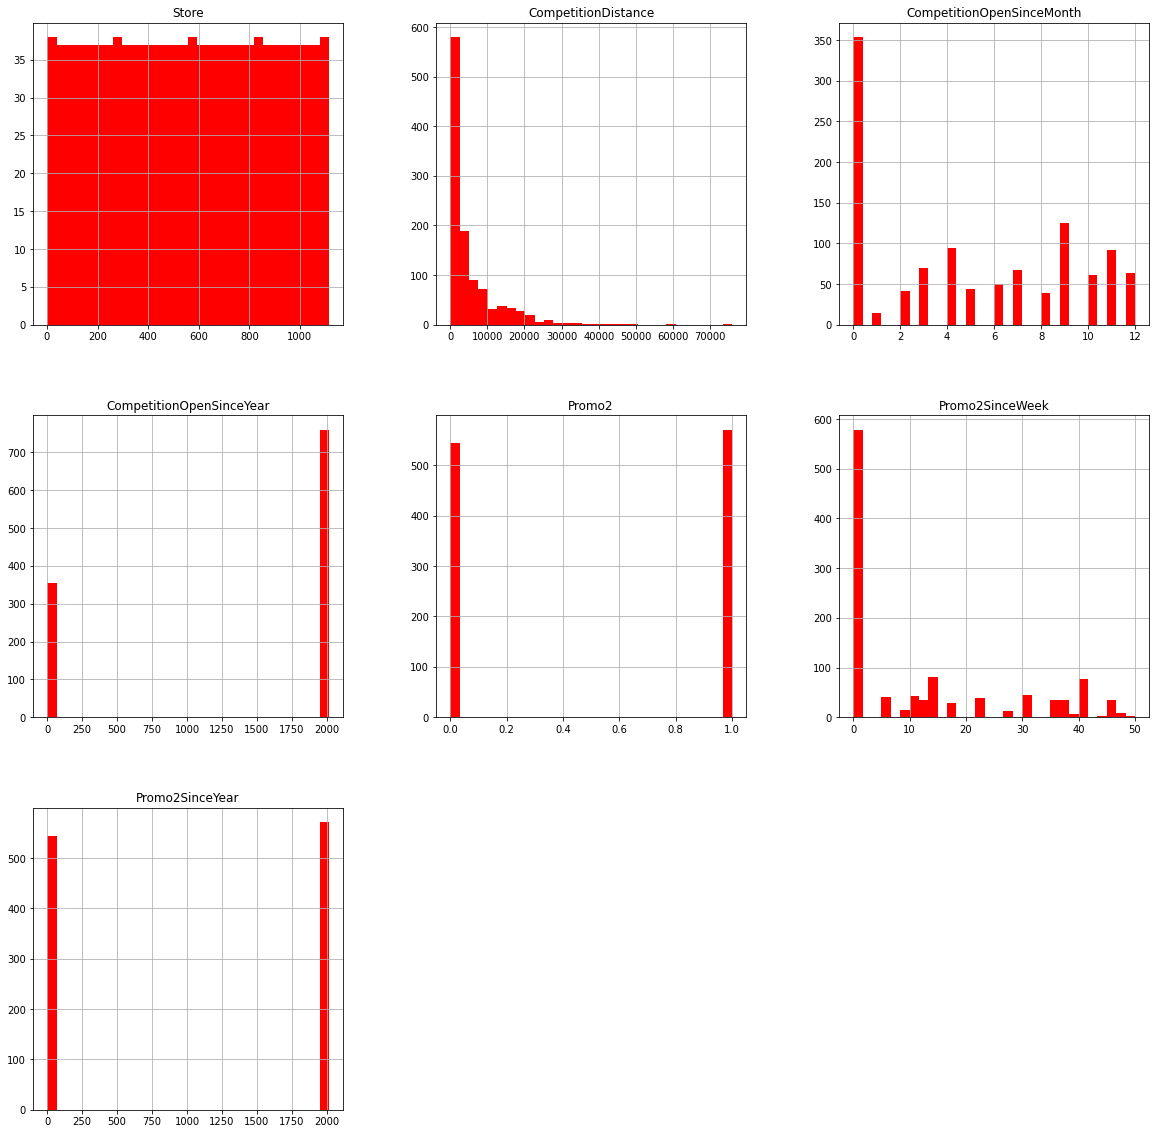

In [40]:
df_store_info.hist(bins=30,figsize=(20,20),color='r');